# Hailey Stahl

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Download the data using Panda’s DataReader() function

In [ ]:
# Start and end dates

In [3]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021,12,31)

In [4]:
# Getting data for Uber & Lyft
W = data.DataReader("WMT", 'yahoo', start, end)
T = data.DataReader("TGT", 'yahoo', start, end)

# Create the column %-chg

In [5]:
W['%-chg'] = W['Close'].pct_change()
T['%-chg'] = T['Close'].pct_change()

# Create the column log returns

In [10]:
W['Log_returns'] = np.log(W['Close']/W['Close'].shift())
T['Log_returns'] = np.log(T['Close']/T['Close'].shift())

# Viewing new columns for both companies

In [11]:
W[['%-chg','Log_returns']]

,%-chg,Log_returns
Date,,
2021-01-04,NaN,NaN
2021-01-05,-0.005323,-0.005337
2021-01-06,0.006244,0.006224
2021-01-07,-0.000068,-0.000068
2021-01-08,-0.000136,-0.000136
...,...,...
2021-12-27,0.009105,0.009063
2021-12-28,0.014351,0.014249
2021-12-29,-0.000490,-0.000490


In [12]:
T[['%-chg','Log_returns']]

,%-chg,Log_returns
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.015425,0.015308
2021-01-06,0.047403,0.046313
2021-01-07,0.011539,0.011473
2021-01-08,0.013082,0.012997
...,...,...
2021-12-27,0.013981,0.013884
2021-12-28,0.003614,0.003608
2021-12-29,0.013383,0.013294


# Create a combined plot of the volumes for both companies. 

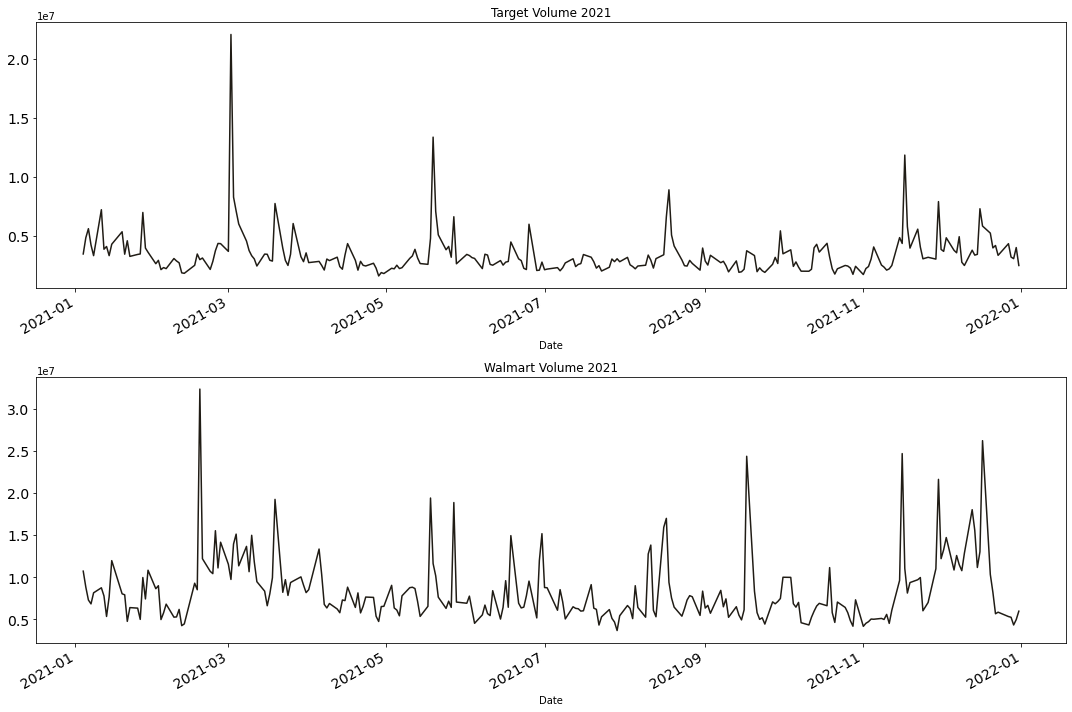

In [50]:
fig, ax = plt.subplots(2)
T['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="Target Volume 2021", figsize=(15,10),color='#201C15',fontsize=14)
W['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="Walmart Volume 2021", figsize=(15,10),color='#201C15',fontsize=14)

fig.tight_layout()

March of 2021 has the highest volume for both companies.
Walmart has the higher volume during the year 2021. They have more peaks and higher peaks throughout the year.
Target only  had about two occasions where the volume was at or above 1.5 Whearas Walmart seemeed to reach 1.5 consistantly. 


# Create a combined plot of the log returns on both companies and on the line right below comment and compare both returns.

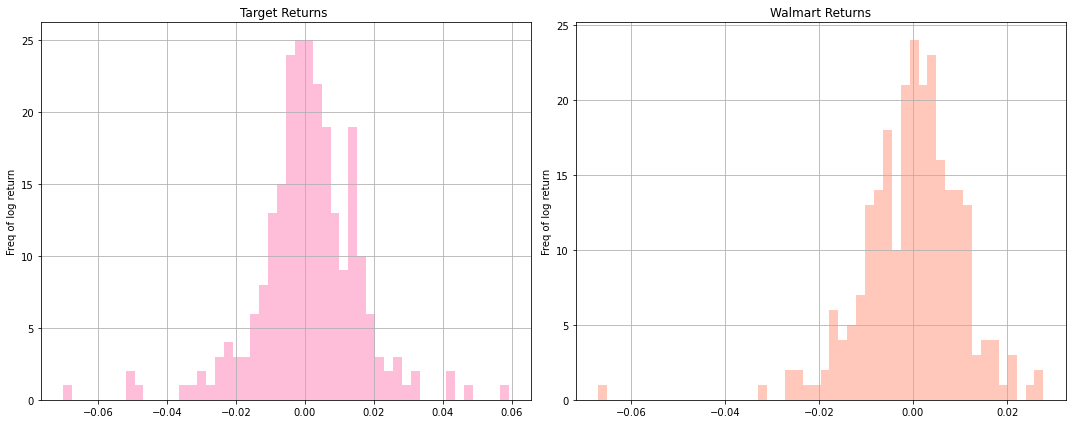

In [42]:
fig, ax = plt.subplots(1,2)
T['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='#FE94C0', figsize=(15,6))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("Target Returns ")

# Lyft Returns
W['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='#FFA48F', figsize=(15,6))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("Walmart Returns")

fig.tight_layout()

The Log return is the rate of return on a investment and lets us compare rate of returns of different companies.  
We would want a potitive Log return indicating a return and not a loss. 
Target appears to have more instances at the tails of the distribution.Both seem to have an outlier at around 0.06. 
Walmart appears to have a more stable rate of return since it's distrubution is more compact than Target.

# Calculate the volatility for both companies and comment on how to interpret this volatility

Volatility in this context tells us how often the price of a stock  moves. 

# Target Volatility

In [52]:
Target_volatility = T['Log_returns'].std()*np.sqrt(252)
print(round(Target_volatility*100,2),"%")

23.76 %


Target's stock price has a volatility of 23.76%. 

# Walmart Volatility

In [53]:
Walmart_volatility = W['Log_returns'].std()*np.sqrt(252)
print(round(Walmart_volatility*100,2),"%")

16.77 %


Walmart's stock price has a volatility of 16.77%. 

For the year 2021, Target's stock price varied 7% more throughout the year than Walmart's stock price.
This means Target's stock could be seen as more risky since it changed more throughout the year wheras Walmart's was a little more stable. 